In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files

uploaded = files.upload()


Saving mnist_train.csv.zip to mnist_train.csv.zip


In [6]:
df = pd.read_csv('mnist_train.csv')
display(df.head())

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import zipfile
import io

zip_ref = zipfile.ZipFile(io.BytesIO(uploaded['mnist_train.csv.zip']), 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
df = np.array(df)
m, n = df.shape
np.random.shuffle(df)

In [8]:
train_df = df[0:int(0.8*m),:]
val_df = df[int(0.8*m):m,:]
x_train = train_df[:,1:].T
x_train = x_train / 225.0
y_train = train_df[:,0]
x_val = val_df[:,1:].T
x_val = x_val / 225.0
y_val = val_df[:,0]

In [9]:
def init_parameters():
  w1 = np.random.rand(10,784)-0.5
  b1 = np.random.rand(10,1)-0.5
  w2 = np.random.rand(10,10)-0.5
  b2 = np.random.rand(10,1)-0.5
  return w1, b1, w2, b2

def RelU(x):
 return np.maximum(0,x)

def softmax_calc(x):
  return np.exp(x) / sum(np.exp(x))

def forward_propagation(w1, b1, w2, b2, x):
  z1 = np.dot(w1, x) + b1
  a1 = RelU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax_calc(z2)
  return z1, a1, z2, a2

def one_hot(y):
  one_hot_y = np.zeros((y.size, y.max() + 1))
  one_hot_y[np.arange(y.size), y] = 1
  return one_hot_y.T

def backward_propagation(w1,b1,w2,b2,z1, a1, z2, a2,x,y):
  one_hot_y = one_hot(y)
  m = y.size
  dz2 = a2 - one_hot_y
  dw2 = 1 / m * dz2.dot(a1.T)
  db2 = 1 / m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * (z1>0)
  dw1 = 1 / m * dz1.dot(x.T)
  db1 = 1 / m * np.sum(dz1)
  return dw1, db1, dw2, db2

def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2
  return w1, b1, w2, b2

def get_predictions(a2):
  return np.argmax(a2, 0)

def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
  w1, b1, w2, b2 = init_parameters()

  for i in range(iterations):
   z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, x)
   dw1, db1, dw2, db2 = backward_propagation(w1, b1, w2, b2, z1, a1, z2, a2, x, y)
   w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
   if(i%20)==0:
    print("Iteration: ", i)
    predictions = get_predictions(a2)
    print(get_accuracy(predictions, y))
  return w1, b1, w2, b2



In [10]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.1, 1000)

Iteration:  0
[5 2 9 ... 9 5 9] [3 0 3 ... 2 2 1]
0.06
Iteration:  20
[2 0 0 ... 2 0 4] [3 0 3 ... 2 2 1]
0.2567291666666667
Iteration:  40
[0 0 0 ... 2 0 9] [3 0 3 ... 2 2 1]
0.3585625
Iteration:  60
[0 0 0 ... 2 0 8] [3 0 3 ... 2 2 1]
0.4368958333333333
Iteration:  80
[3 0 0 ... 2 0 8] [3 0 3 ... 2 2 1]
0.4992083333333333
Iteration:  100
[3 0 5 ... 2 0 1] [3 0 3 ... 2 2 1]
0.567125
Iteration:  120
[3 0 5 ... 2 0 1] [3 0 3 ... 2 2 1]
0.6173333333333333
Iteration:  140
[3 0 5 ... 2 0 1] [3 0 3 ... 2 2 1]
0.6535416666666667
Iteration:  160
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.6823541666666667
Iteration:  180
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.7048541666666667
Iteration:  200
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.7239166666666667
Iteration:  220
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.7403958333333334
Iteration:  240
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.7543541666666667
Iteration:  260
[3 0 3 ... 2 0 1] [3 0 3 ... 2 2 1]
0.7664166666666666
Iteration:  280
[3 0 3 ... 2 0 1] [3 0 3 ... 

predicted label: [0]
actual label: 0


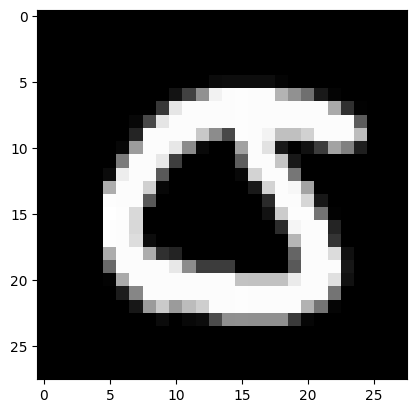

In [19]:
import matplotlib.pyplot as plt
val_index = 10
z1_val,a1_val,z2_val,a2_val = forward_propagation(w1, b1, w2, b2, x_val[:,val_index].reshape(-1, 1))
print("predicted label:", get_predictions(a2_val))
print("actual label:", y_val[val_index])

image_array = x_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.show()